In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Library**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/dataset/heart/heart.csv'
df = pd.read_csv(path)

**Exploratory Data Analysis**

In [4]:
print("\nBeberapa Baris Data Pertama:")
df.head()


Beberapa Baris Data Pertama:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [7]:
total_df = df.shape
print(f"Total data: {total_df[0]} baris dan {total_df[1]} kolom")

Total data: 918 baris dan 12 kolom


In [8]:
for column in df.columns:
    print(f"Variable: {column}")
    print(df[column].value_counts())
    print("\n")

Variable: Age
Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64


Variable: Sex
Sex
M    725
F    193
Name: count, dtype: int64


Variable: ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


Variable: RestingBP
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: count, Length: 67, dtype: int64


Variable: Cholesterol
Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466   

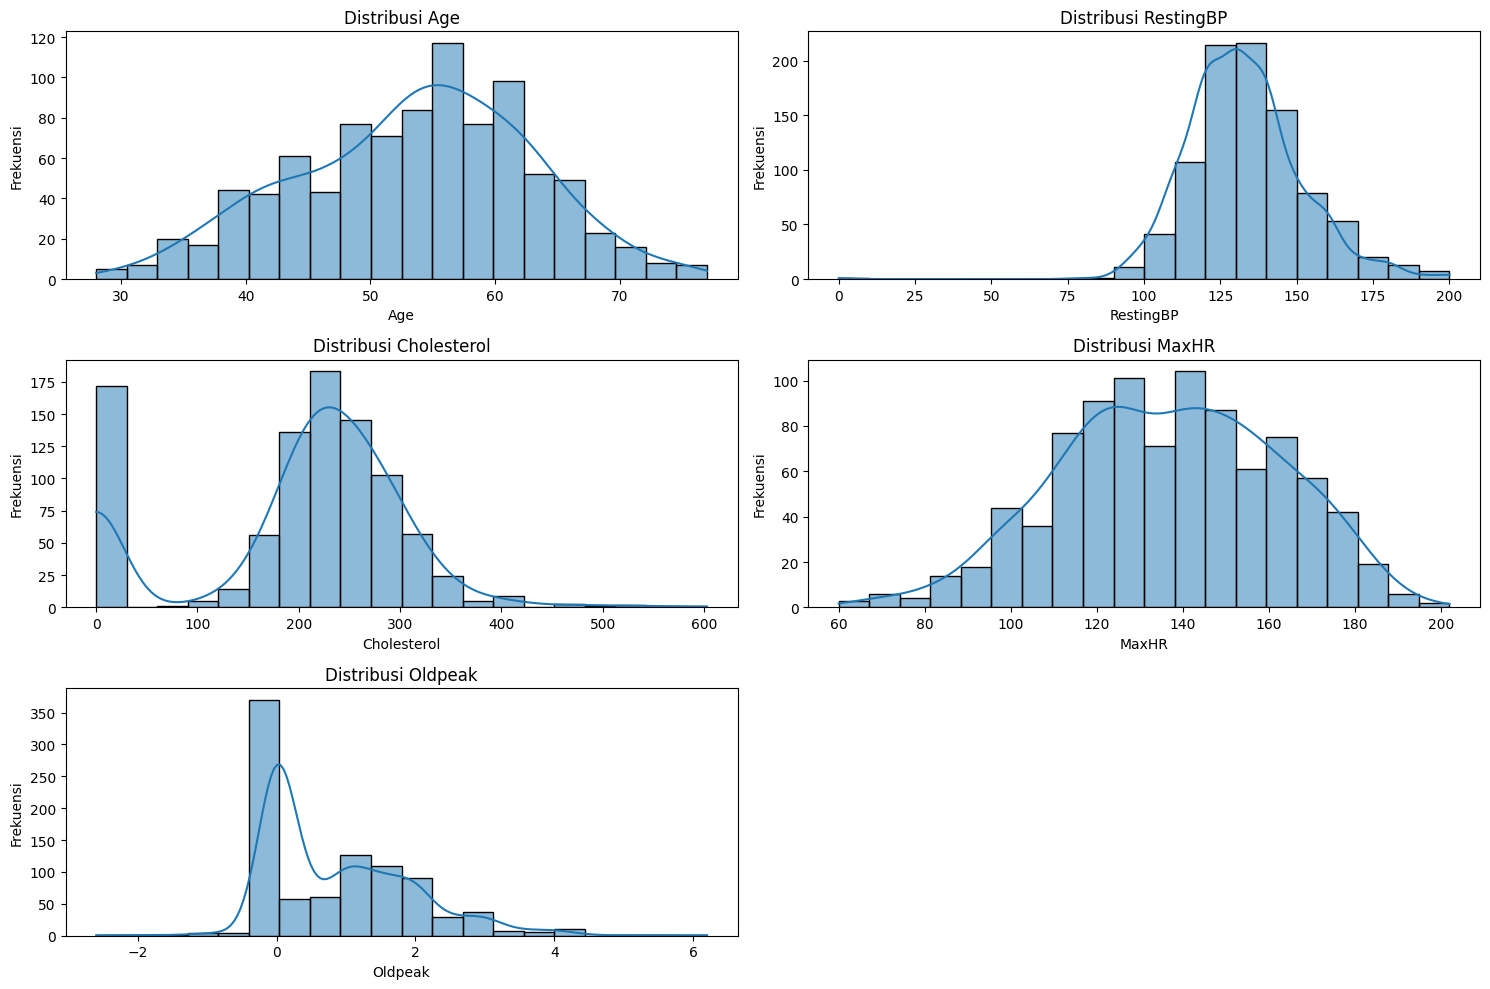

In [9]:
numerical_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribusi {var}')
    plt.xlabel(var)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


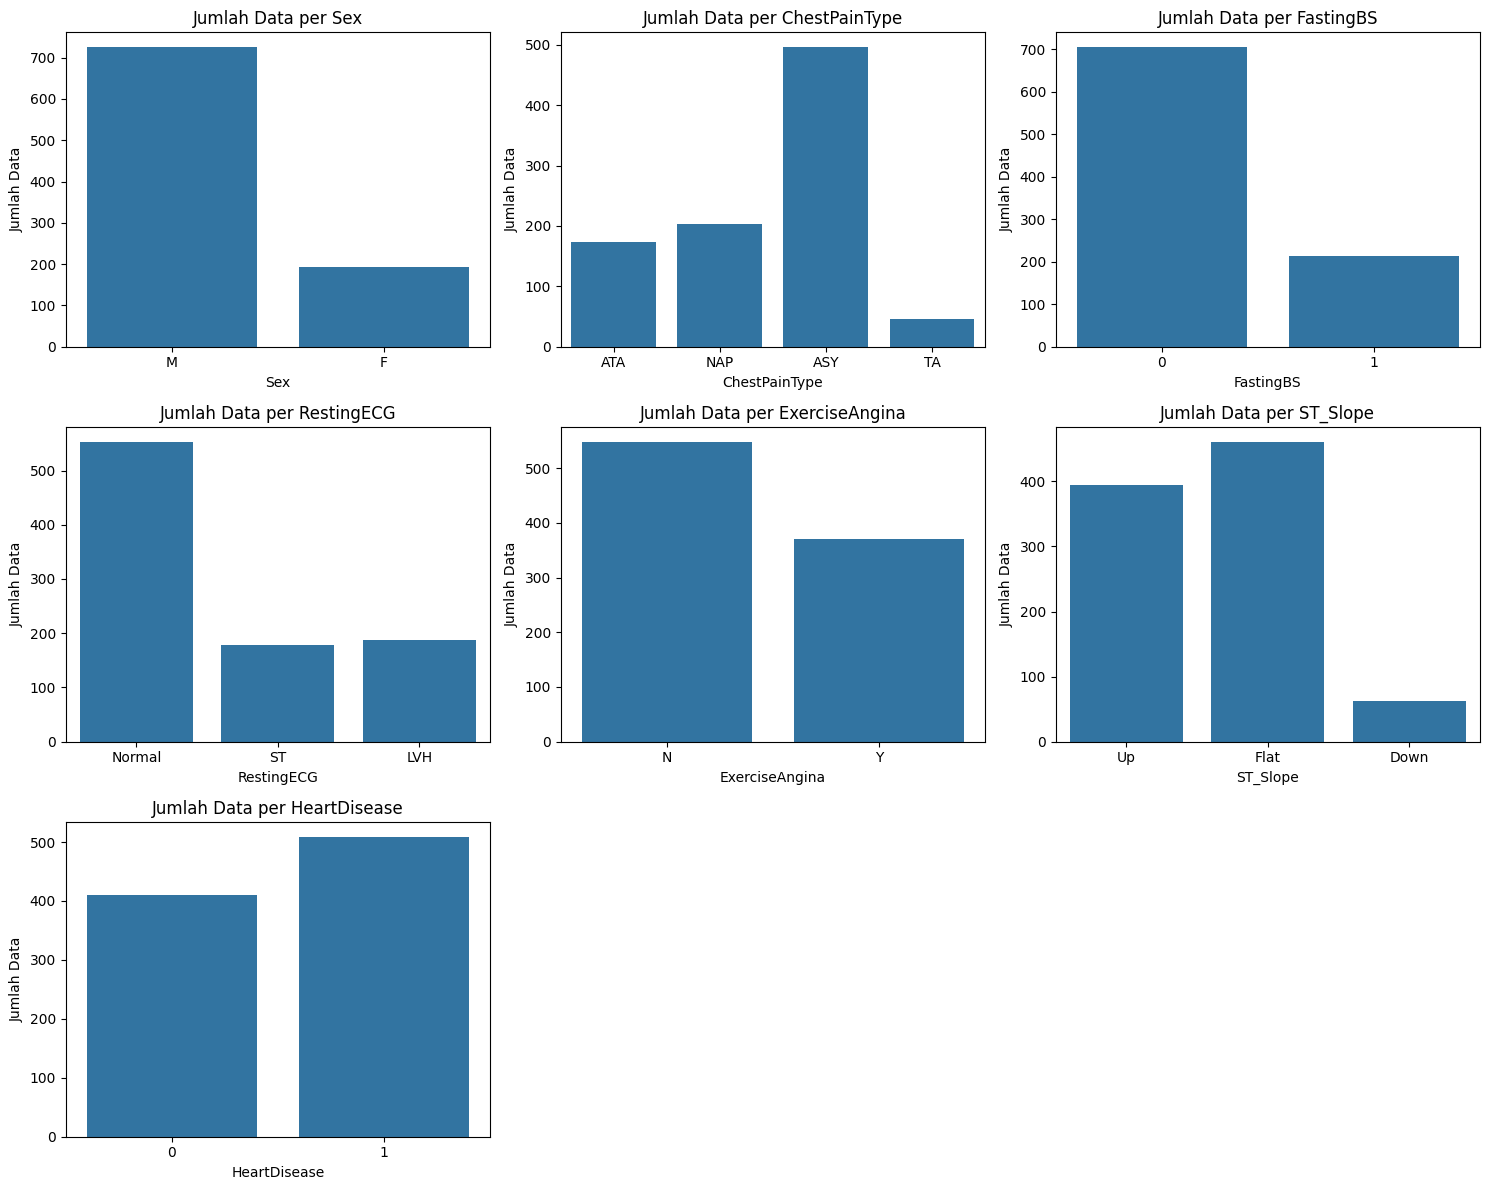

In [10]:
categorical_variables = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

plt.figure(figsize=(15, 12))
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df)
    plt.title(f'Jumlah Data per {var}')
    plt.xlabel(var)
    plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()

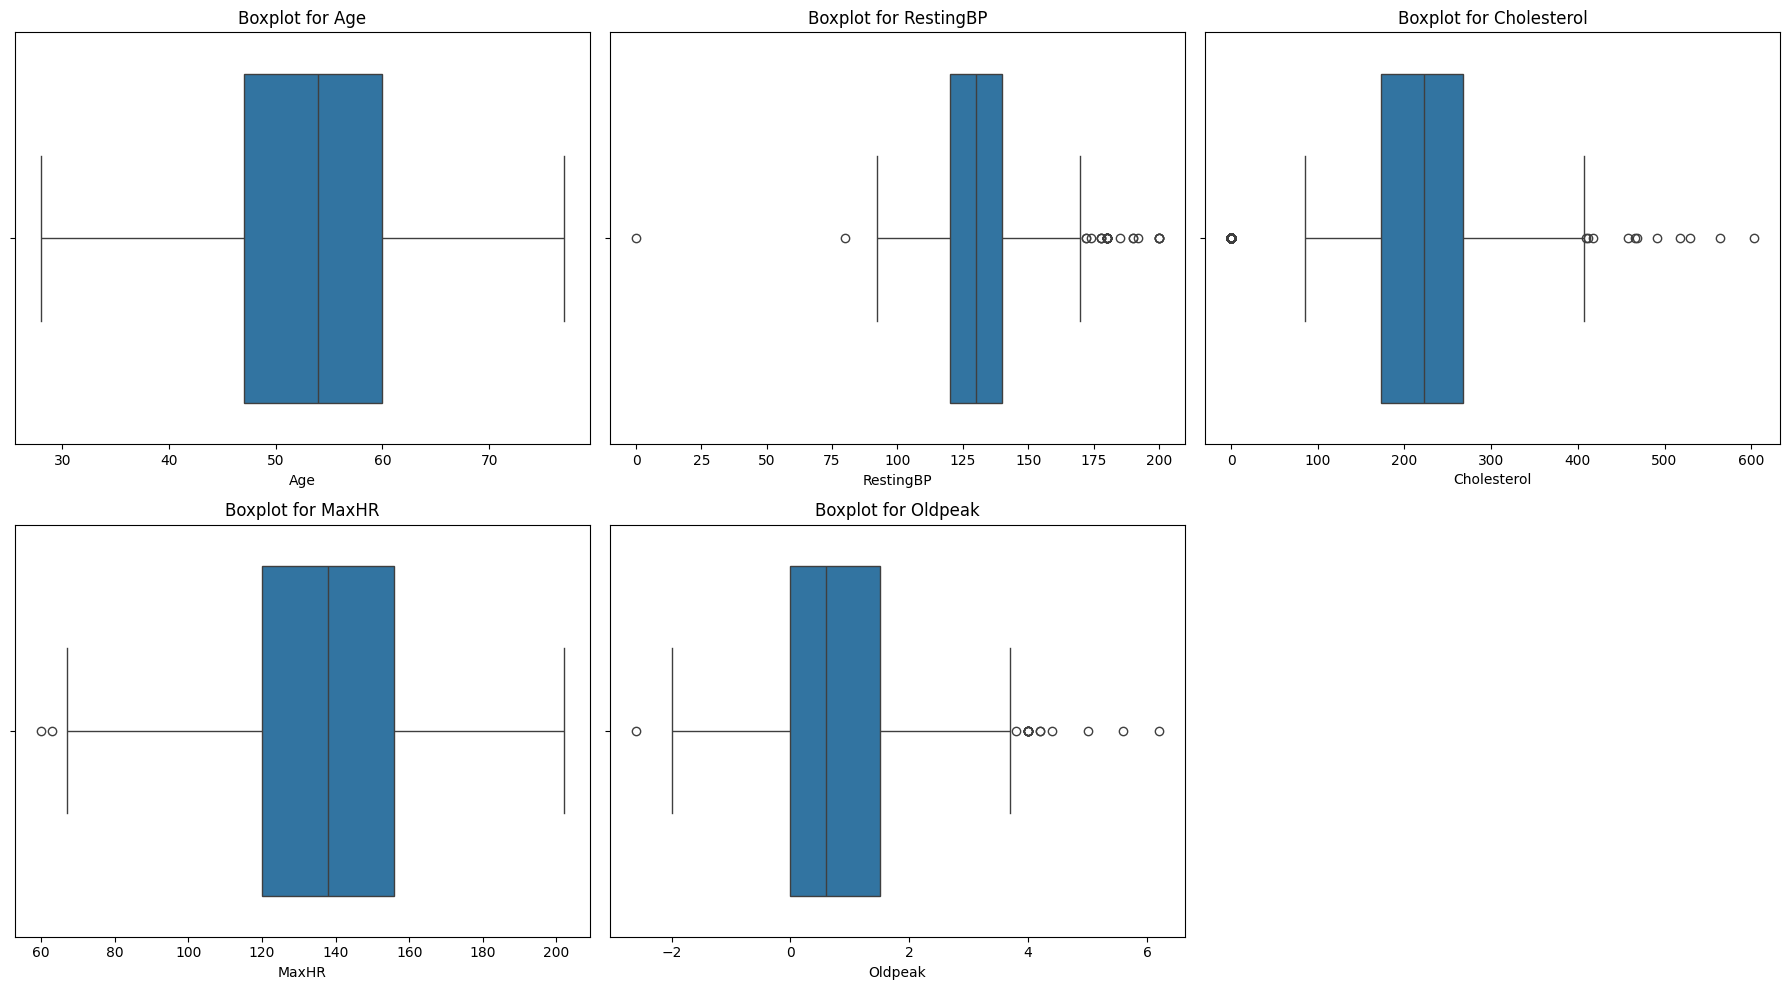

In [11]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

num_plots = len(numerical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(18, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**Preprocessing Data**

Delete Outlier

In [12]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df[numerical_columns] < (Q1 - 0.75 * IQR)) | (df[numerical_columns] > (Q3 + 1.0 * IQR))).any(axis=1)]

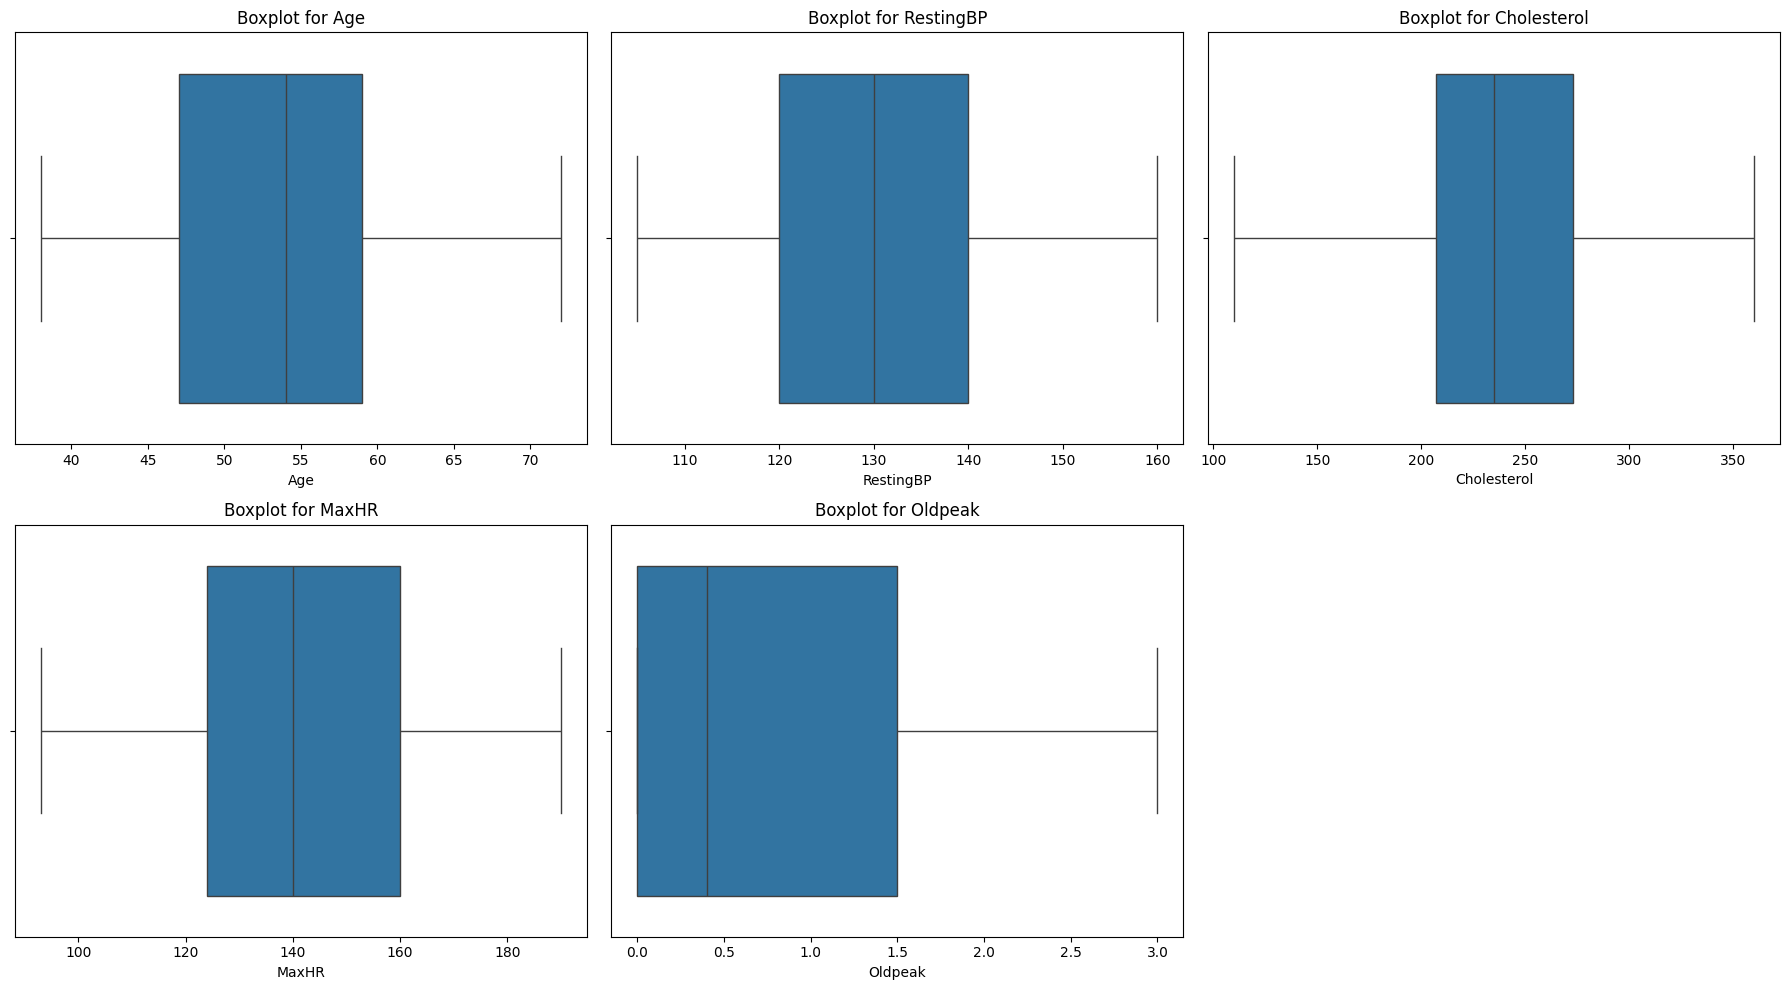

In [13]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

num_plots = len(numerical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(18, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

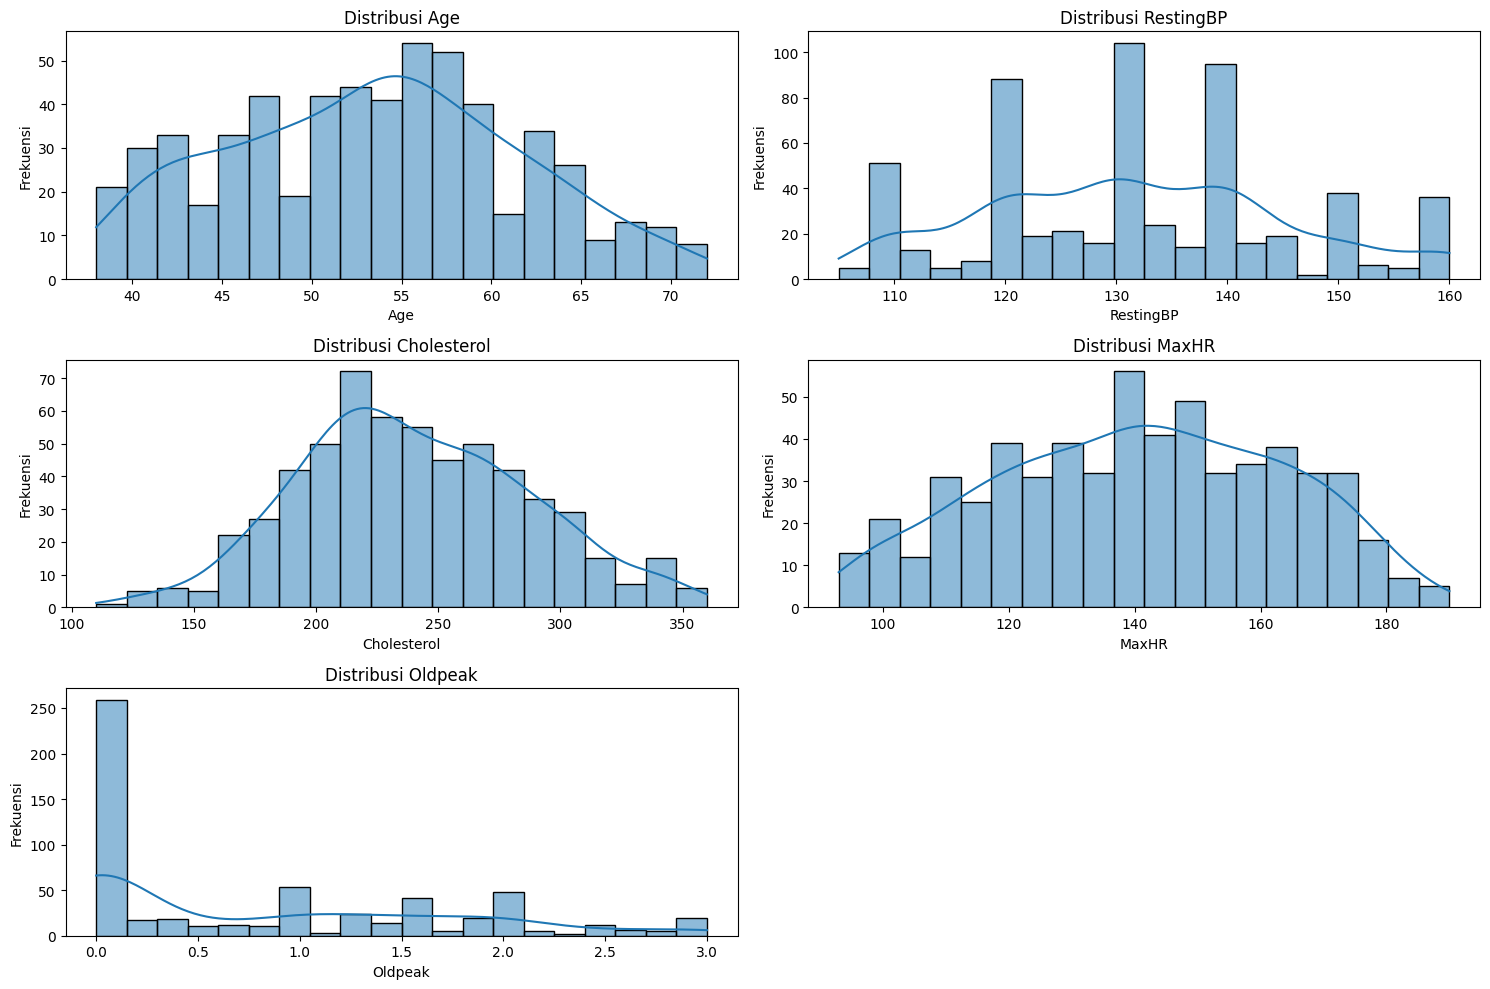

In [14]:
numerical_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_cleaned[var], bins=20, kde=True)
    plt.title(f'Distribusi {var}')
    plt.xlabel(var)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [37]:
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")

Original data shape: (918, 12)
Cleaned data shape: (585, 12)


Encoding Data

In [16]:
mapping_dict = {
    'Sex': {'M': 1, 'F': 0},
    'ChestPainType': {'ASY': 1, 'NAP': 2, 'ATA': 3, 'TA': 0},
    'RestingECG': {'Normal': 1, 'LVH': 2, 'ST': 3},
    'ExerciseAngina': {'Y': 1, 'N': 0},
    'ST_Slope': {'Flat': 1, 'Up': 2, 'Down': 3}
}

df_cleaned = df_cleaned.apply(lambda col: col.map(mapping_dict[col.name]) if col.name in mapping_dict.keys() else col)

df_cleaned = df_cleaned.astype({'Sex': int, 'ChestPainType': int, 'RestingECG': int, 'ExerciseAngina': int, 'ST_Slope': int})


In [17]:
print("\nBeberapa Baris Data Pertama:")
df_cleaned.head()


Beberapa Baris Data Pertama:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
3,48,0,1,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0


In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             585 non-null    int64  
 1   Sex             585 non-null    int64  
 2   ChestPainType   585 non-null    int64  
 3   RestingBP       585 non-null    int64  
 4   Cholesterol     585 non-null    int64  
 5   FastingBS       585 non-null    int64  
 6   RestingECG      585 non-null    int64  
 7   MaxHR           585 non-null    int64  
 8   ExerciseAngina  585 non-null    int64  
 9   Oldpeak         585 non-null    float64
 10  ST_Slope        585 non-null    int64  
 11  HeartDisease    585 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 59.4 KB


**Modelling**

In [19]:
X = df_cleaned.drop('HeartDisease', axis=1)
y = df_cleaned['HeartDisease']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print("Jumlah data dalam training set:", len(X_train))
print("Jumlah data dalam testing set:", len(X_test))

Jumlah data dalam training set: 468
Jumlah data dalam testing set: 117


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = LogisticRegression(max_iter=1000, random_state=42)

In [24]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
y_pred = model.predict(X_test_scaled)

**Evaluasi**

In [26]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [27]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.85
Confusion Matrix:
[[55  5]
 [13 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        60
           1       0.90      0.77      0.83        57

    accuracy                           0.85       117
   macro avg       0.85      0.84      0.84       117
weighted avg       0.85      0.85      0.85       117



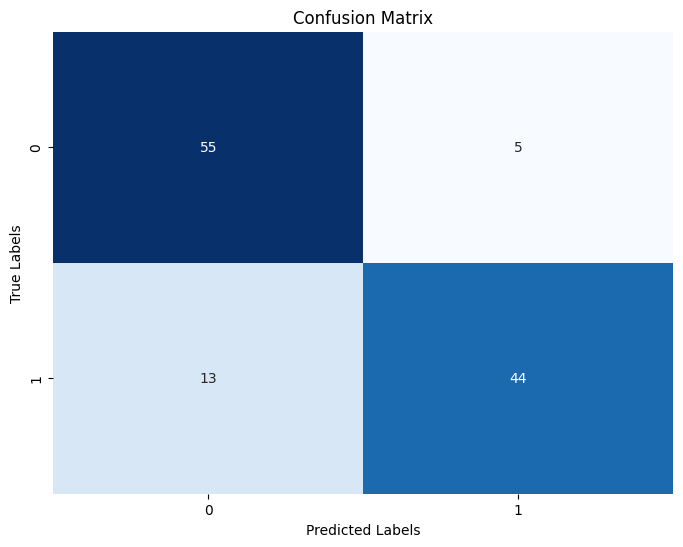

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Test Model**

In [29]:
test_data = pd.DataFrame({
    'Age': [45],
    'Sex': [1],
    'ChestPainType': [2],
    'RestingBP': [130],
    'Cholesterol': [250],
    'FastingBS': [0],
    'RestingECG': [1],
    'MaxHR': [170],
    'ExerciseAngina': [0],
    'Oldpeak': [1.0],
    'ST_Slope': [2]
})

test_data_scaled = scaler.transform(test_data)

static_pred = model.predict(test_data_scaled)

result = "Tidak terkena penyakit jantung" if static_pred[0] == 0 else "Terkena penyakit jantung"

print("Prediksi untuk data input spesifik:", static_pred[0])
print("Hasil interpretasi:", result)


Prediksi untuk data input spesifik: 0
Hasil interpretasi: Tidak terkena penyakit jantung


**Koefisien Regresi**

In [30]:
coefficients = pd.DataFrame({"Fitur": X.columns, "Koefisien Regresi": model.coef_[0]})

print("\nKoefisien Regresi:")
print(coefficients)


Koefisien Regresi:
             Fitur  Koefisien Regresi
0              Age           0.171470
1              Sex           0.678437
2    ChestPainType          -0.533138
3        RestingBP          -0.070359
4      Cholesterol           0.160228
5        FastingBS           0.165548
6       RestingECG           0.072040
7            MaxHR          -0.225390
8   ExerciseAngina           0.599457
9          Oldpeak           0.629135
10        ST_Slope          -0.737048


In [31]:
coefficients_sorted = coefficients.sort_values(by='Koefisien Regresi', ascending=False)

print("\nKoefisien Regresi (Diurutkan):")
print(coefficients_sorted)


Koefisien Regresi (Diurutkan):
             Fitur  Koefisien Regresi
1              Sex           0.678437
9          Oldpeak           0.629135
8   ExerciseAngina           0.599457
0              Age           0.171470
5        FastingBS           0.165548
4      Cholesterol           0.160228
6       RestingECG           0.072040
3        RestingBP          -0.070359
7            MaxHR          -0.225390
2    ChestPainType          -0.533138
10        ST_Slope          -0.737048


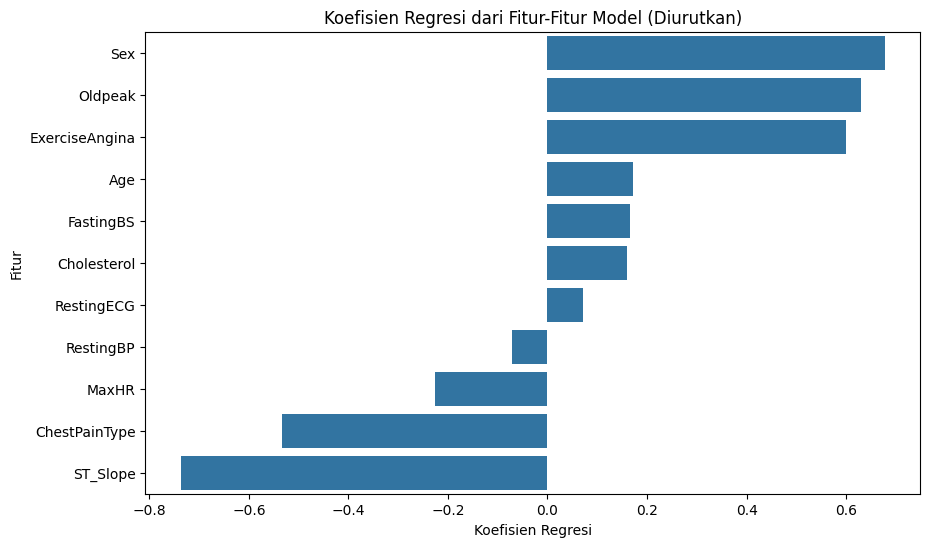

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Koefisien Regresi', y='Fitur', data=coefficients_sorted)
plt.title('Koefisien Regresi dari Fitur-Fitur Model (Diurutkan)')
plt.xlabel('Koefisien Regresi')
plt.ylabel('Fitur')
plt.show()

**Download Model**

In [34]:
import pickle

In [36]:
with open('heart_disease_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('coefficients.pkl', 'wb') as f:
    pickle.dump(model.coef_, f)

print("Model dan scaler berhasil disimpan!")

Model dan scaler berhasil disimpan!
